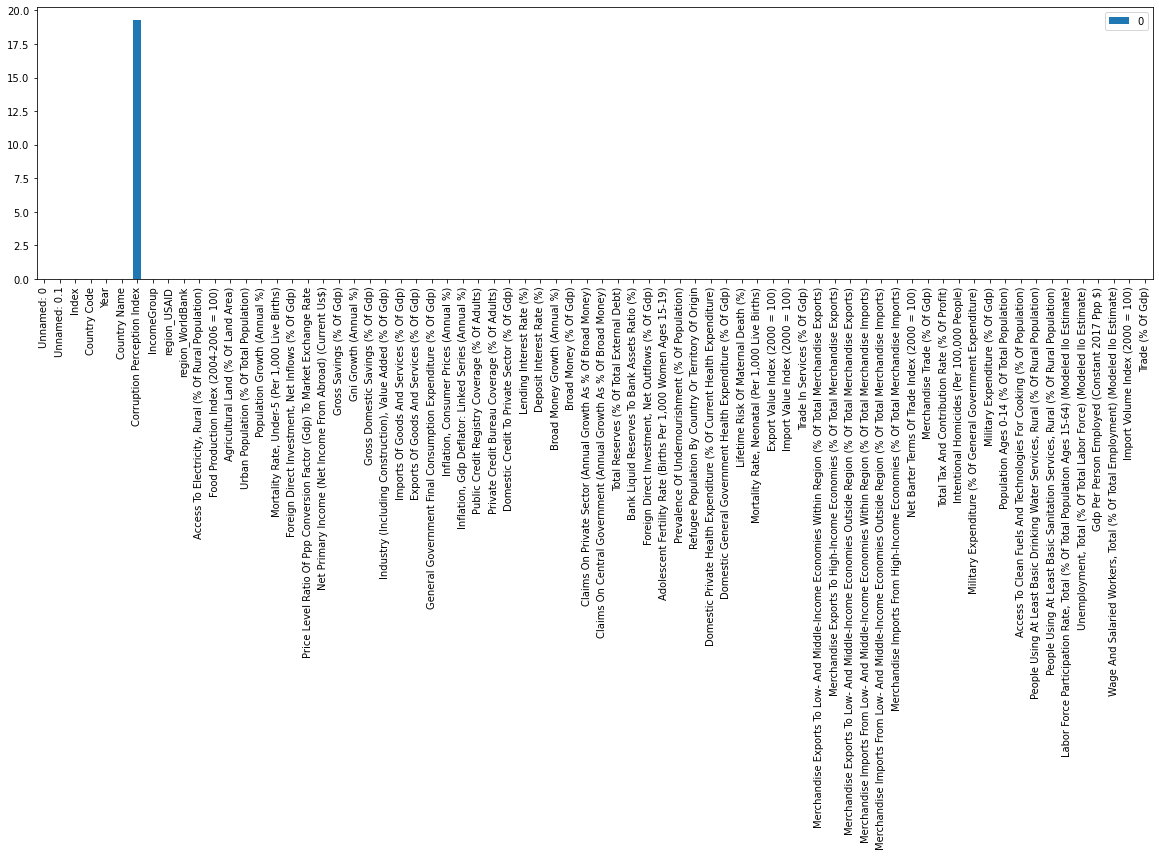

In [1]:
import pandas as pd

df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/final.csv')
pd.DataFrame(df.isna().sum()*100/df.shape[0]).plot.bar(figsize=(20,5))
df = df.dropna()

In [2]:
## Researving this column for the end
df_RWB = df['region_WorldBank']

# dropping unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1','region_WorldBank','Country Code','Country Name','Year'],axis=1,inplace=True)
df.dropna()

,Index,Corruption Perception Index,IncomeGroup,region_USAID,"Access To Electricity, Rural (% Of Rural Population)",Food Production Index (2004-2006 = 100),Agricultural Land (% Of Land Area),Urban Population (% Of Total Population),Population Growth (Annual %),"Mortality Rate, Under-5 (Per 1,000 Live Births)",...,Population Ages 0-14 (% Of Total Population),Access To Clean Fuels And Technologies For Cooking (% Of Population),"People Using At Least Basic Drinking Water Services, Rural (% Of Rural Population)","People Using At Least Basic Sanitation Services, Rural (% Of Rural Population)","Labor Force Participation Rate, Total (% Of Total Population Ages 15-64) (Modeled Ilo Estimate)","Unemployment, Total (% Of Total Labor Force) (Modeled Ilo Estimate)",Gdp Per Person Employed (Constant 2017 Ppp $),"Wage And Salaried Workers, Total (% Of Total Employment) (Modeled Ilo Estimate)",Import Volume Index (2000 = 100),Trade (% Of Gdp)
56,196,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
57,197,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
58,198,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
59,199,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
60,200,18.0,Low income,South and Central Asia (SCA),19.868266,108.92000,58.067580,23.113,2.493842,99.5,...,48.126233,15.99000,33.732741,27.476086,49.344002,11.046,7056.174167,8.852000,187.697479,55.393618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,5359,37.0,Lower middle income,Sub-Saharan Africa (SSA),13.997699,171.55394,32.476466,42.976,2.951583,64.3,...,45.411369,16.75112,41.952058,18.932012,75.505997,11.626,9648.782217,21.349001,567.892902,71.585759
4020,5360,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4021,5361,35.0,Lower middle income,Sub-Saharan Africa (SSA),10.968000,156.42136,33.127447,43.521,2.912801,63.3,...,44.936141,16.58418,44.134510,18.919180,75.313004,11.500,9676.891123,21.507000,626.417589,72.966216
4022,5362,34.0,Lower middle income,Sub-Saharan Africa (SSA),13.775150,153.82510,34.782422,44.072,2.892373,61.7,...,44.462509,17.74318,45.556623,18.179606,75.259003,11.425,9479.540064,21.563000,344.359603,70.035035


In [3]:
#### PRE PROCESSING ###

In [4]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels, we will only do it for columns where we see a level, it is in order  
label_encoder = preprocessing.LabelEncoder()
df['IncomeGroup']= label_encoder.fit_transform(df['IncomeGroup'])

In [5]:
#Categorical Columns

object_type = df.select_dtypes(include=['object']).columns.to_list()
print(object_type)

['region_USAID']


In [6]:
## Seperating the data. 

y = df[['Corruption Perception Index']]
X = df.drop(['Corruption Perception Index','Index'],axis=1, inplace = True)

#one hot encoding the coulmns 
X = pd.get_dummies(df)


# SCALING THE DATA
#we will see if this helps in the end
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [7]:
#drop region world bank when doing modelling and don't use index
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Model Fitting

from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/vibhuverma/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

print(mean_absolute_error(y_test, predictions))
print(r2_score(y_test, predictions))
print(mean_squared_error(y_test, predictions))






In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# plot feature importance
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14, 24)
plot_importance(model)
#pyplot.show()

In [ ]:
plot_importance(model,max_num_features=30)

In [ ]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)

In [ ]:
important_features.sort_values(ascending=False)

In [ ]:
fscore=model.get_booster().get_score()
fscore

In [ ]:
df1 = pd.DataFrame(list(fscore.items()),columns = ['Indicators','F_score'])
df1

In [ ]:
df1['Percentile_rank']=df1.F_score.rank(pct=True)
df1.sort_values(by="F_score", ascending=False)

df1.to_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/World_Bank_development_indicators/f_score.csv')

In [ ]:
df2=df1[df1['Percentile_rank'] >= 0.7].sort_values(by='F_score', ascending=False)
df2
df2.to_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/Final datasets/World_Bank_development_indicators/f_score_selected.csv')

In [ ]:
len(df2)

In [ ]:
#df2.to_csv("30percentile_index.csv")

In [ ]:
df = pd.read_csv('/Users/vibhuverma/Desktop/CLASSWORK/BUSINESS PRACTICUM/Anti-Corruption/final.csv')
df3 = df.dropna()
df3

In [ ]:
df4=df3[['Index','Country Code','Country Name','Year','IncomeGroup','Corruption Perception Index',
    "Gni Growth (Annual %)",
"Intentional Homicides (Per 100,000 People)",
"Food Production Index (2004-2006 = 100)",
"Claims On Central Government (Annual Growth As % Of Broad Money)",
"Foreign Direct Investment, Net Inflows (% Of Gdp)",
"Import Value Index (2000 = 100)",
"Inflation, Consumer Prices (Annual %)",
"Claims On Private Sector (Annual Growth As % Of Broad Money)",
"Inflation, Gdp Deflator: Linked Series (Annual %)",
"Broad Money Growth (Annual %)",
"Import Volume Index (2000 = 100)",
"Merchandise Imports From Low- And Middle-Income Economies Outside Region (% Of Total Merchandise Imports)",
"Bank Liquid Reserves To Bank Assets Ratio (%)",
"Total Tax And Contribution Rate (% Of Profit)",
"Exports Of Goods And Services (% Of Gdp)",
"Merchandise Imports From High-Income Economies (% Of Total Merchandise Imports)",
"Industry (Including Construction), Value Added (% Of Gdp)",
"Price Level Ratio Of Ppp Conversion Factor (Gdp) To Market Exchange Rate",
"Merchandise Exports To Low- And Middle-Income Economies Within Region (% Of Total Merchandise Exports)"]]
df4

In [ ]:
df4.reset_index(drop=True, inplace=True)
df4

In [ ]:
#df4.to_csv("selected_indicators.csv")